# Rep Member Fees Regression

## Importing Data (Quarterly)

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm


In [2]:
excel_file_path = 'Quarterly_simplified.xlsx'

all_dfs = pd.read_excel(excel_file_path, sheet_name=None)

In [3]:
fees = all_dfs['MySuper_Fees']

In [4]:
fees.columns

Index(['Period', 'MySuper product name', 'MySuper product type', 'Fund name',
       'Fund ABN', 'IndCost', 'InvFee', 'AdmFee', 'AdvFee', 'InsFee',
       'OthFee'],
      dtype='object')

In [5]:
# Convert 'Period' into datetime format and extract the year
fees['Year'] = pd.to_datetime(fees['Period']).dt.year

# List of fee columns to aggregate
fee_columns = ['IndCost', 'InvFee', 'AdmFee', 'AdvFee', 'InsFee', 'OthFee']

# Group by 'Year', 'MySuper product name', 'MySuper product type', 'Fund name', and 'Fund ABN'
# then calculate the mean for each fee column
annual_average = fees.groupby(['Year', 'MySuper product name', 'MySuper product type', 'Fund name', 'Fund ABN'])[fee_columns].mean().reset_index()

print(annual_average)

     Year          MySuper product name MySuper product type  \
0    2014  AFLPA & AFL Industry MySuper       Large employer   
1    2014                   AMG MySuper              Generic   
2    2014                 AMIST MySuper              Generic   
3    2014              AMP MySuper No.1              Generic   
4    2014              AMP MySuper No.2              Generic   
..    ...                           ...                  ...   
935  2022                Vision MySuper              Generic   
936  2022     Water Corporation MySuper       Large employer   
937  2022    Westpac Group Plan MySuper       Large employer   
938  2022      Woolworths Group MySuper       Large employer   
939  2022         smartMonday Lifecycle              Generic   

                                         Fund name     Fund ABN  IndCost  \
0                 AMP Superannuation Savings Trust  76514770399    0.000   
1                                        AMG Super  30099320583    1.230   
2  

In [6]:
annual_average

,Year,MySuper product name,MySuper product type,Fund name,Fund ABN,IndCost,InvFee,AdmFee,AdvFee,InsFee,OthFee
0,2014,AFLPA & AFL Industry MySuper,Large employer,AMP Superannuation Savings Trust,76514770399,0.000,0.400,0.44,0.0,0.0,0.00
1,2014,AMG MySuper,Generic,AMG Super,30099320583,1.230,0.000,0.13,0.0,0.0,0.00
2,2014,AMIST MySuper,Generic,Australian Meat Industry Superannuation Trust,28342064803,0.600,0.530,0.25,0.0,0.0,0.00
3,2014,AMP MySuper No.1,Generic,AMP Retirement Trust,73310248809,0.000,0.150,0.70,0.0,0.0,0.00
4,2014,AMP MySuper No.2,Generic,AMP Superannuation Savings Trust,76514770399,0.000,0.400,0.81,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
935,2022,Vision MySuper,Generic,Local Authorities Superannuation Fund,24496637884,0.000,0.520,0.30,0.0,0.0,0.00
936,2022,Water Corporation MySuper,Large employer,AMP Super Fund,78421957449,0.360,0.515,0.11,0.0,0.0,0.30
937,2022,Westpac Group Plan MySuper,Large employer,Retirement Wrap,39827542991,0.120,0.500,0.12,0.0,0.0,0.00
938,2022,Woolworths Group MySuper,Large employer,AMP Super Fund,78421957449,0.345,0.570,0.08,0.0,0.0,0.27


## Importing Data (Annually)

In [7]:
excel_file_path = 'Annual_simplified.xlsx'

all_dfs = pd.read_excel(excel_file_path, sheet_name=None)

In [8]:
financial = all_dfs['Financial_Performance']
profile = all_dfs['Fund_Profile']

In [9]:
merged_df = pd.merge(financial, profile, on=['Period', 'Fund name', 'ABN', 'Fund type'], how='inner')

In [10]:
merged_df

,Period,Fund name,ABN,Fund type,NtABeg,TtlIn,TtlOut,NtFlows,NtOuRt,TtlGain,...,1YrRet_x,TtlAst,PrcAst,InvExpR,OprExpR,1YrRet_y,5YrRet,10YrRet,TtlAcc,GrwAcc
0,2022-06-30,Centric Super Fund,9.159354e+10,Retail,0,0,0,0,0.000,0,...,0.000,0,0.00,0.000,0.000,0.000,0.00000,0.00000,0,0.0
1,2022-06-30,Colonial First State Rollover & Superannuation...,8.885464e+10,Retail,0,0,0,0,0.000,0,...,0.000,0,0.00,0.000,0.000,0.000,0.00000,0.00000,0,0.0
2,2022-06-30,Heidelberg Australia Superannuation Fund,7.507123e+10,Retail,0,0,0,0,0.000,0,...,0.000,0,0.00,0.000,0.000,0.000,0.00000,0.00000,0,0.0
3,2022-06-30,Holden Employees Superannuation Fund,7.728932e+10,Corporate,0,0,0,0,0.000,0,...,0.000,0,0.00,0.000,0.000,0.000,0.00000,0.00000,0,0.0
4,2022-06-30,Energy Industries Superannuation Scheme-Pool B,6.432209e+10,Public Sector,0,0,0,0,0.000,0,...,0.000,0,0.00,0.000,0.000,0.000,0.00000,0.00000,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2014-06-30,Water Corporation Superannuation Plan,1.609578e+10,Corporate,315657,33010,9344,25672,0.416,26301,...,0.114,382503,0.00,0.001,0.003,0.114,0.08515,0.06247,0,0.0
1496,2014-06-30,Wealth Personal Superannuation and Pension Fund,9.238191e+10,Retail,17447226,1334736,1242631,2514577,0.470,1585309,...,0.106,21922794,0.00,0.000,0.006,0.106,0.06243,0.00000,0,0.0
1497,2014-06-30,Westpac Mastertrust - Superannuation Division,8.123690e+10,Retail,5607661,435780,175894,-271023,1.520,526092,...,0.095,5787189,0.62,0.000,0.003,0.095,0.07412,0.04699,0,0.0
1498,2014-06-30,Worsley Alumina Superannuation Fund,5.146955e+10,Retail,246471,27076,1708,12850,0.651,13971,...,0.087,282182,0.24,0.002,0.001,0.087,0.08222,0.07497,0,0.0


In [11]:
merged_df.columns

Index(['Period', 'Fund name', 'ABN', 'Fund type', 'NtABeg', 'TtlIn', 'TtlOut',
       'NtFlows', 'NtOuRt', 'TtlGain', 'InvInc', 'NtEarn', 'NtEaTx', 'NtAEnd',
       '1YrRet_x', 'TtlAst', 'PrcAst', 'InvExpR', 'OprExpR', '1YrRet_y',
       '5YrRet', '10YrRet', 'TtlAcc', 'GrwAcc'],
      dtype='object')

## Merging Datasets

In [12]:
merged_df['Year'] = pd.to_datetime(merged_df['Period']).dt.year

# Merge merged_df with fees on the specified columns using an inner join
final_df = pd.merge(merged_df, annual_average, left_on=['Year', 'Fund name', 'ABN'], right_on=['Year', 'Fund name', 'Fund ABN'], how='inner').drop(columns=['Fund ABN'])

print(final_df)

        Period                                      Fund name           ABN  \
0   2022-06-30                    Australian Retirement Trust  6.090512e+10   
1   2022-06-30                    Australian Retirement Trust  6.090512e+10   
2   2022-06-30                   Retirement Portfolio Service  6.180819e+10   
3   2022-06-30                   Retirement Portfolio Service  6.180819e+10   
4   2022-06-30               Russell Investments Master Trust  8.938475e+10   
..         ...                                            ...           ...   
868 2014-06-30                          Virgin Superannuation  8.843661e+10   
869 2014-06-30        WA Local Government Superannuation Plan  1.815950e+10   
870 2014-06-30          Water Corporation Superannuation Plan  1.609578e+10   
871 2014-06-30  Westpac Mastertrust - Superannuation Division  8.123690e+10   
872 2014-06-30            Worsley Alumina Superannuation Fund  5.146955e+10   

         Fund type     NtABeg     TtlIn   TtlOut   

In [13]:
final_df.columns

Index(['Period', 'Fund name', 'ABN', 'Fund type', 'NtABeg', 'TtlIn', 'TtlOut',
       'NtFlows', 'NtOuRt', 'TtlGain', 'InvInc', 'NtEarn', 'NtEaTx', 'NtAEnd',
       '1YrRet_x', 'TtlAst', 'PrcAst', 'InvExpR', 'OprExpR', '1YrRet_y',
       '5YrRet', '10YrRet', 'TtlAcc', 'GrwAcc', 'Year', 'MySuper product name',
       'MySuper product type', 'IndCost', 'InvFee', 'AdmFee', 'AdvFee',
       'InsFee', 'OthFee'],
      dtype='object')

## Adding Merger Variables

In [14]:
excel_file_path = 'Merged SF Annual Data.xlsx'

all_dfs = pd.read_excel(excel_file_path, sheet_name=None)

In [15]:
annual = all_dfs['Annual']

In [16]:
final_df = pd.merge(final_df, annual, on=['Period', 'Fund name', 'ABN'], how='left')

final_df['Merger'] = final_df['Merger'].fillna(0)

final_df['Merged'] = final_df['Merged'].fillna(0)

## Calculating Variables

In [57]:
final_df.TtlAcc

0       2216337
1       2216337
2       2216337
3       2216337
4        719569
         ...   
1085          0
1086          0
1087          0
1088          0
1089          0
Name: TtlAcc, Length: 1090, dtype: int64

In [17]:
small_constant = 1e-10

final_df['log_NtABeg'] = np.log(final_df['NtABeg'] + small_constant)
final_df['log_TtlAst'] = np.log(final_df['TtlAst'] + small_constant)
final_df['log_TtlAcc'] = np.log(final_df['TtlAcc'] + small_constant)

In [38]:
final_df['Interaction'] = final_df['log_TtlAcc'] * final_df['Merger']

In [58]:
final_df['Interaction_1'] = final_df['log_TtlAst'] * final_df['Merger']

In [18]:
final_df.columns

Index(['Period', 'Fund name', 'ABN', 'Fund type', 'NtABeg', 'TtlIn', 'TtlOut',
       'NtFlows', 'NtOuRt', 'TtlGain', 'InvInc', 'NtEarn', 'NtEaTx', 'NtAEnd',
       '1YrRet_x', 'TtlAst', 'PrcAst', 'InvExpR', 'OprExpR', '1YrRet_y',
       '5YrRet', '10YrRet', 'TtlAcc', 'GrwAcc', 'Year', 'MySuper product name',
       'MySuper product type', 'IndCost', 'InvFee', 'AdmFee', 'AdvFee',
       'InsFee', 'OthFee', 'Merger', 'Merged', 'Acquirer', 'log_NtABeg',
       'log_TtlAst', 'log_TtlAcc'],
      dtype='object')

## Regression Models

In [78]:
#Investment Fees per Rep Member

# Extract dependent and independent variables from df_quarterly
Y = final_df['InvFee']
X = final_df[['Merger', 'log_TtlAst']]
X = sm.add_constant(X)  # Add a constant to the model (i.e., the intercept)

# Set up and run the regression model
model = sm.OLS(Y, X).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 InvFee   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.998
Date:                Mon, 06 Nov 2023   Prob (F-statistic):              0.136
Time:                        10:27:15   Log-Likelihood:                -161.00
No. Observations:                1090   AIC:                             328.0
Df Residuals:                    1087   BIC:                             343.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3482      0.049      7.074      0.0

In [20]:
#Admin Fees per Rep Member

# Extract dependent and independent variables from df_quarterly
Y = final_df['AdmFee']
X = final_df[['Merger', 'log_TtlAst']]
X = sm.add_constant(X)  # Add a constant to the model (i.e., the intercept)

# Set up and run the regression model
model = sm.OLS(Y, X).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 AdmFee   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     17.08
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           4.99e-08
Time:                        22:44:55   Log-Likelihood:                 243.36
No. Observations:                1090   AIC:                            -480.7
Df Residuals:                    1087   BIC:                            -465.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5270      0.034     15.516      0.0

In [21]:
#Advice Fees per Rep Member

# Extract dependent and independent variables from df_quarterly
Y = final_df['AdvFee']
X = final_df[['Merger', 'log_TtlAst']]
X = sm.add_constant(X)  # Add a constant to the model (i.e., the intercept)

# Set up and run the regression model
model = sm.OLS(Y, X).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 AdvFee   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3264
Date:                Fri, 27 Oct 2023   Prob (F-statistic):              0.722
Time:                        22:44:55   Log-Likelihood:                 6666.0
No. Observations:                1090   AIC:                        -1.333e+04
Df Residuals:                    1087   BIC:                        -1.331e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.903e-05   9.38e-05      1.056      0.2

In [22]:
#Insurance Fees per Rep Member

# Extract dependent and independent variables from df_quarterly
Y = final_df['InsFee']
X = final_df[['Merger', 'log_TtlAst']]
X = sm.add_constant(X)  # Add a constant to the model (i.e., the intercept)

# Set up and run the regression model
model = sm.OLS(Y, X).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 InsFee   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3146
Date:                Fri, 27 Oct 2023   Prob (F-statistic):              0.730
Time:                        22:44:55   Log-Likelihood:                 2598.2
No. Observations:                1090   AIC:                            -5190.
Df Residuals:                    1087   BIC:                            -5175.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0048      0.004      1.217      0.2

In [23]:
#Other Fees per Rep Member

# Extract dependent and independent variables from df_quarterly
Y = final_df['OthFee']
X = final_df[['Merger', 'log_TtlAst']]
X = sm.add_constant(X)  # Add a constant to the model (i.e., the intercept)

# Set up and run the regression model
model = sm.OLS(Y, X).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 OthFee   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     11.22
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           1.50e-05
Time:                        22:44:55   Log-Likelihood:                 1240.8
No. Observations:                1090   AIC:                            -2476.
Df Residuals:                    1087   BIC:                            -2461.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0417      0.014     -3.064      0.0

# Descriptive Statistics

In [26]:
variables_of_interest = ['OthFee', 'InsFee', 'AdvFee', 'AdmFee', 'InvFee', 'log_TtlAcc']

summary_statistics = final_df[variables_of_interest].describe()
print(summary_statistics)

            OthFee       InsFee       AdvFee       AdmFee       InvFee  \
count  1090.000000  1090.000000  1090.000000  1090.000000  1090.000000   
mean      0.019646     0.002115     0.000032     0.332197     0.374298   
std       0.078344     0.022329     0.000535     0.196660     0.281130   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.206667     0.016250   
50%       0.000000     0.000000     0.000000     0.270000     0.400000   
75%       0.000000     0.000000     0.000000     0.400000     0.555000   
max       0.520000     0.470000     0.010000     1.210000     1.390000   

        log_TtlAcc  
count  1090.000000  
mean      7.359777  
std      11.904656  
min     -23.025851  
25%       9.905642  
50%      11.481075  
75%      13.569849  
max      14.872005  


# Graphs

/var/folders/1p/89s8czgd3m7f_535cwnrk58c0000gn/T/ipykernel_76612/111683409.py:13: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in grouped:
/var/folders/1p/89s8czgd3m7f_535cwnrk58c0000gn/T/ipykernel_76612/111683409.py:13: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in grouped:
/var/folders/1p/89s8czgd3m7f_535cwnrk58c0000gn/T/ipykernel_76612/111683409.py:13: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in grouped:
/var/fo

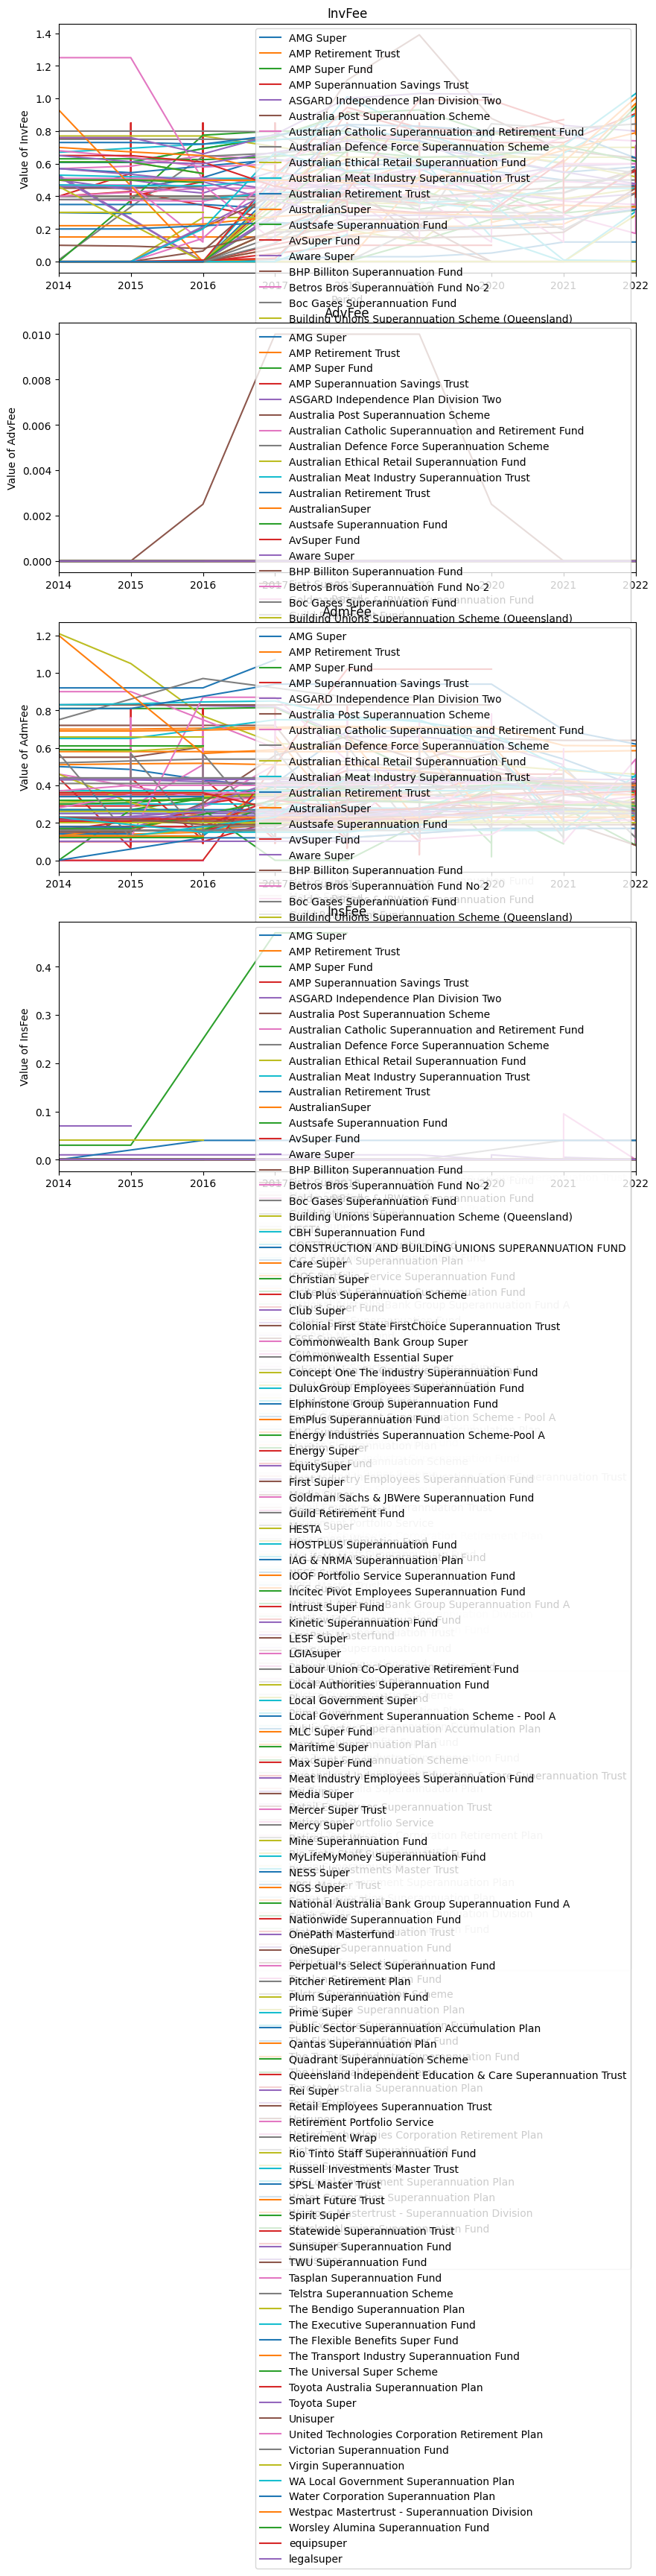

In [36]:
import matplotlib.pyplot as plt

# Group by 'Fund'
grouped = final_df.groupby(['Fund name'])

# Create subplots for each fee
fig, axes = plt.subplots(4, 1, figsize=(10, 20))
fees = ['InvFee', 'AdvFee', 'AdmFee', 'InsFee']

# Loop through each fee type and subplot
for i, fee in enumerate(fees):
    ax = axes[i]
    for name, group in grouped:
        group.plot(x='Period', y=fee, ax=ax, label=name)
    ax.set_title(fee)
    ax.set_ylabel(f'Value of {fee}')
    ax.set_xlabel('Period')
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()
